# Clasificación

Importamos todas las librerías que vamos a utilizar   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importamos el data set de vuelta

In [2]:
ds_properati = pd.read_csv('nuevo_dataset_properati.csv')
ds_properati.drop(columns=['Unnamed: 0','geometry'], inplace=True)
ds_properati.head() 

,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency
0,2021-09-09,-34.631621,-58.416825,Capital Federal,BOEDO,Venta,PH,4.0,2.0,109.394701,73.0,250000.0,USD
1,2021-09-09,-34.623886,-58.412746,Capital Federal,BOEDO,Venta,PH,2.0,1.0,61.000000,46.0,100000.0,USD
2,2021-09-09,-34.625588,-58.423056,Capital Federal,BOEDO,Venta,PH,4.0,2.0,104.000000,54.0,185000.0,USD
3,2021-09-09,-34.629398,-58.425852,Capital Federal,BOEDO,Venta,Departamento,2.0,1.0,62.000000,44.0,100000.0,USD
4,2021-09-09,-34.626595,-58.420019,Capital Federal,BOEDO,Venta,PH,4.0,3.0,111.000000,101.0,110000.0,USD


#### Construcción del target

Para esta sección crearemos una nueva variable tipo_precio que tendrá tres categorías: alto, medio, bajo. Esta nueva variable será nuestra clase en el problema de clasificación. Para determinar cuando el tipo_precio de una propiedad es alto, medio o bajo se deberá analizar el precio por metro cuadrado (pxm2).

Se divide a la variable en un número específico de bins
Los criterios de agrupamiento pueden ser por ejemplo:
● Igual-Frecuencia: La misma cantidad de observaciones en un bin
● Igual-Ancho: Definimos rangos o intervalos de clases para cada bin
● Cuantiles: Separar en intervalos utilizando Mediana, Cuantiles, Percentiles.

Creamos una nueva columna precio por metro cuadrado en el dataframe.

In [3]:
ds_properati["precio_metro_cuadrado"] = ds_properati["property_price"] / ds_properati["property_surface_total"]
ds_properati.head()

,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,precio_metro_cuadrado
0,2021-09-09,-34.631621,-58.416825,Capital Federal,BOEDO,Venta,PH,4.0,2.0,109.394701,73.0,250000.0,USD,2285.302650
1,2021-09-09,-34.623886,-58.412746,Capital Federal,BOEDO,Venta,PH,2.0,1.0,61.000000,46.0,100000.0,USD,1639.344262
2,2021-09-09,-34.625588,-58.423056,Capital Federal,BOEDO,Venta,PH,4.0,2.0,104.000000,54.0,185000.0,USD,1778.846154
3,2021-09-09,-34.629398,-58.425852,Capital Federal,BOEDO,Venta,Departamento,2.0,1.0,62.000000,44.0,100000.0,USD,1612.903226
4,2021-09-09,-34.626595,-58.420019,Capital Federal,BOEDO,Venta,PH,4.0,3.0,111.000000,101.0,110000.0,USD,990.990991


Ahora la discretizamos en 3 intervalos de igual cantidad de observaciones.

In [4]:
ds_discreto = ds_properati.loc[:,"precio_metro_cuadrado"]

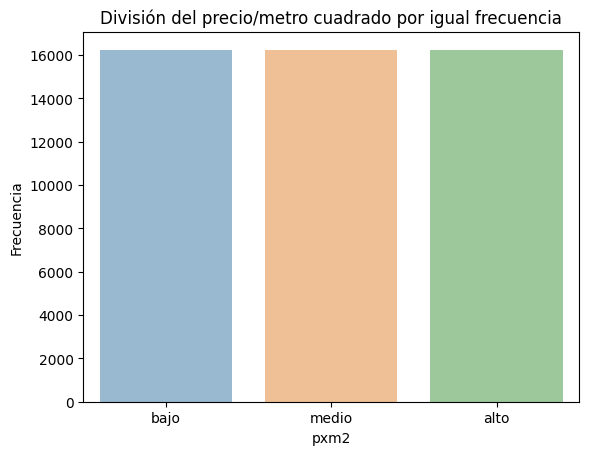

In [5]:
labels=["bajo","medio","alto"]
def dist_equitativa(dataframe):
    dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)

    ds_bygroup = dataframe.groupby(['pxm2_igual_frec']).count()  

    eje_x = ds_bygroup.index.tolist()  
    eje_y = ds_bygroup['precio_metro_cuadrado'].tolist()  

    sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_bygroup ,alpha=0.5).set(title="División del precio/metro cuadrado por igual frecuencia",ylabel='Frecuencia',xlabel='pxm2')
    plt.show()
    return dataframe
dataframe_copy = ds_properati.copy()
dataframe_equitativa = dist_equitativa(dataframe_copy)

Ahora dividimos en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.


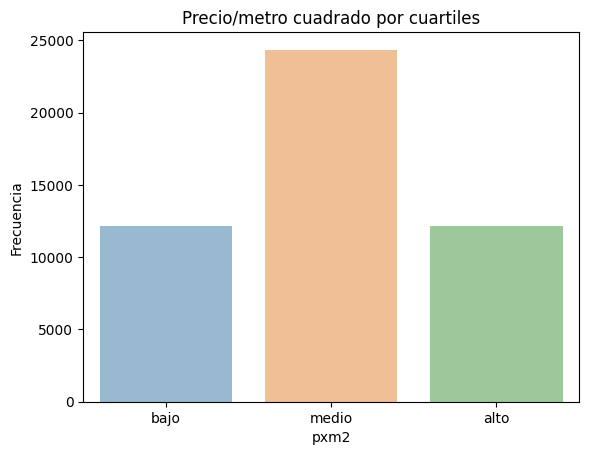

In [6]:
labels=["bajo","medio","alto"]
dataframe = ds_properati.copy()

def dist_25_50_25(dataframe, description):
    dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)

    #Gráfico de barras con Seaborn
    ds_bygroup=dataframe.groupby(['pxm2_25_50_25']).count()  #Calculo la frecuencia de cada categoría

    eje_x = ds_bygroup.index.tolist()   ## Declaramos valores para el eje x
    eje_y = ds_bygroup['precio_metro_cuadrado'].tolist()  ## Declaramos valores para el eje y

    sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, data=ds_bygroup ,alpha=0.5).set(title=description,ylabel='Frecuencia',xlabel='pxm2')
    plt.show()
    return dataframe
    
dataframe = ds_properati.copy()
dataframe_20_50_25 = dist_25_50_25(dataframe, "Precio/metro cuadrado por cuartiles")

Ahora vamos a filtrar por tipo de propiedad y luego dividir como en el punto anterior.

Primero con la propiedad de Departamento

Mostramos la distribución equitativa del tipo departamento

/tmp/ipykernel_8271/2984446388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)


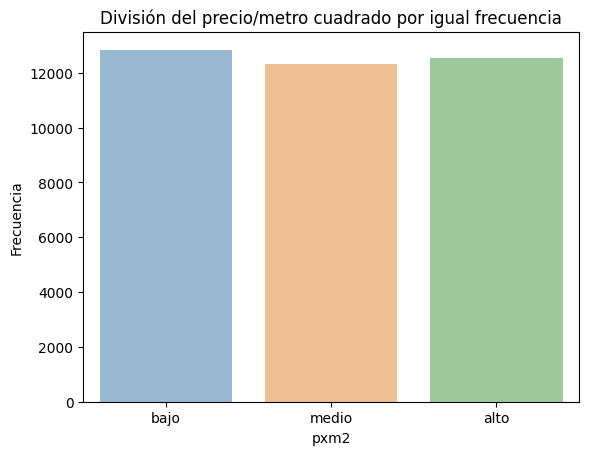

In [7]:
ds_properati_depto = ds_properati.loc[ds_properati["property_type"]=="Departamento"]
ds_equitativa_depto = dist_equitativa(ds_properati_depto)

Mostramos la distribución 25_50_25 del tipo departamento

/tmp/ipykernel_8271/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


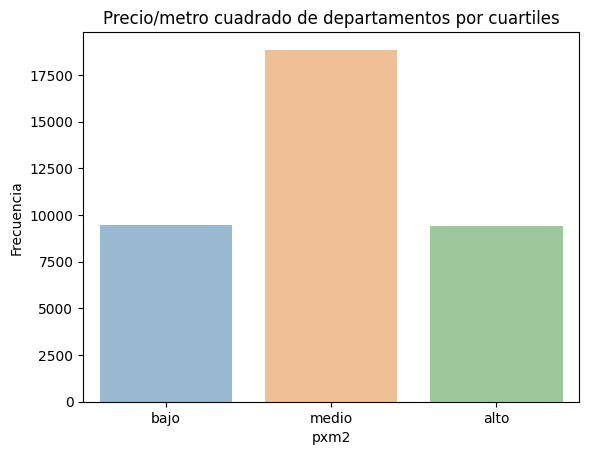

In [8]:
ds_properati_depto = ds_properati.loc[ds_properati["property_type"]=="Departamento"]
dataframe_depto_25_50_25 = dist_25_50_25(ds_properati_depto,"Precio/metro cuadrado de departamentos por cuartiles")

Mostramos la distribucion equitativa de la casa :

/tmp/ipykernel_8271/2984446388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)


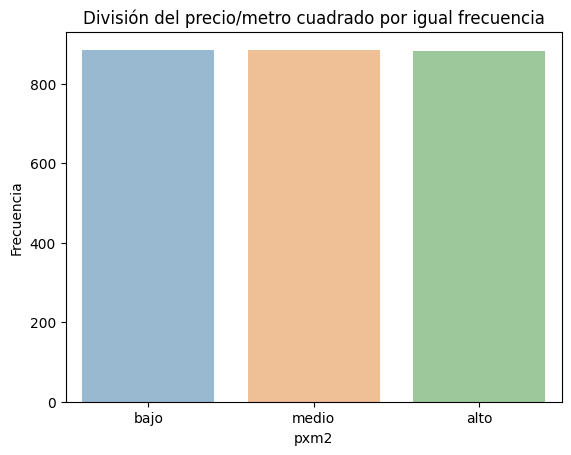

In [9]:
ds_properati_casa = ds_properati.loc[ds_properati["property_type"]=="Casa"]
ds_equitativa_casa = dist_equitativa(ds_properati_casa)

/tmp/ipykernel_8271/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


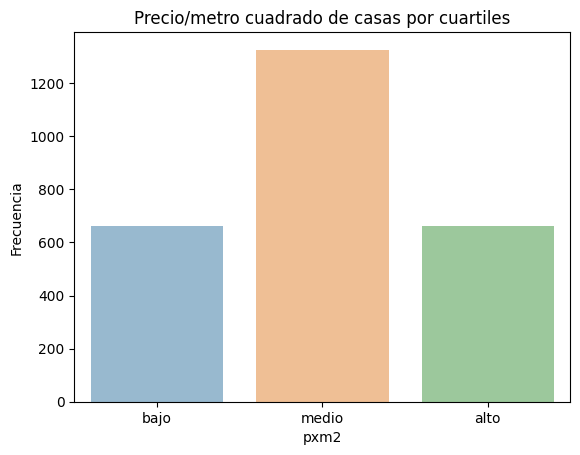

In [10]:
ds_properati_casa = ds_properati.loc[ds_properati["property_type"]=="Casa"]
dataframe_casa_25_50_25 = dist_25_50_25(ds_properati_casa, "Precio/metro cuadrado de casas por cuartiles")

Por ultimo mostramos del tipo Ph 

/tmp/ipykernel_8271/2984446388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_igual_frec"] = pd.qcut(dataframe["precio_metro_cuadrado"],q=3, labels=labels)


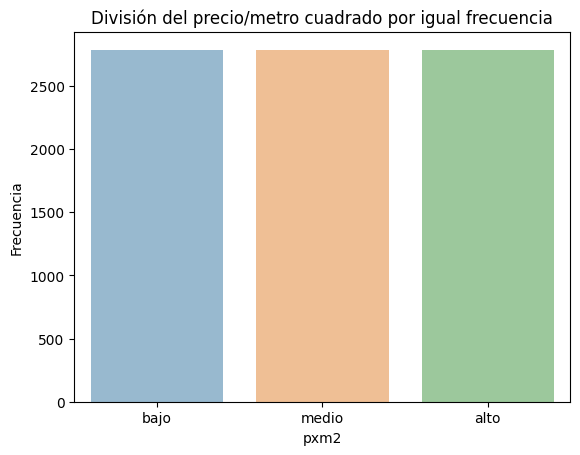

In [11]:
ds_properati_ph = ds_properati.loc[ds_properati["property_type"]=="PH"]
ds_equitativa_ph = dist_equitativa(ds_properati_ph)

/tmp/ipykernel_8271/3344619508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["pxm2_25_50_25"]=pd.qcut(dataframe["precio_metro_cuadrado"],q=[0,0.25,0.75,1], labels=labels)


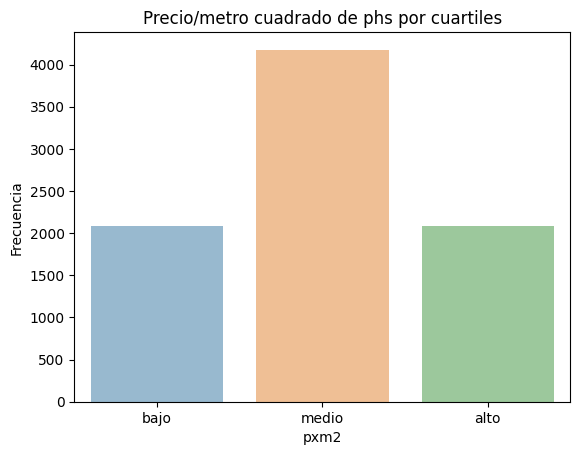

In [12]:
ds_properati_ph = ds_properati.loc[ds_properati["property_type"]=="PH"]
dataframe_ph_25_50_25 = dist_25_50_25(ds_properati_ph, "Precio/metro cuadrado de phs por cuartiles")

Mostramos la distribución del precio por metro cuadrado de todo el database:

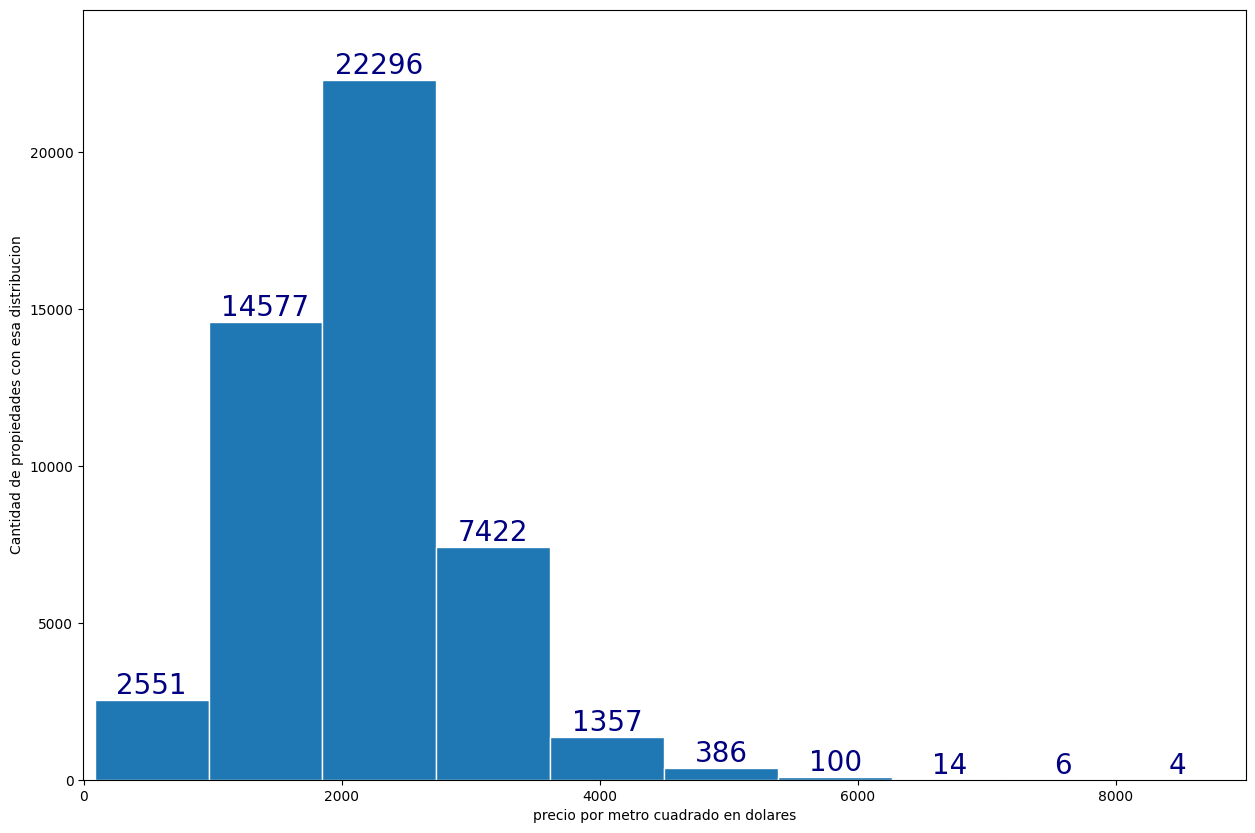

In [13]:

plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distribucion precio por metro cuadrado todo dataset')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()


Ahora mostramos la distribución del precio por metro cuadrado especificando el tipo de propiedad

1-Distribución de precio por metro cuadrado de departamentos:

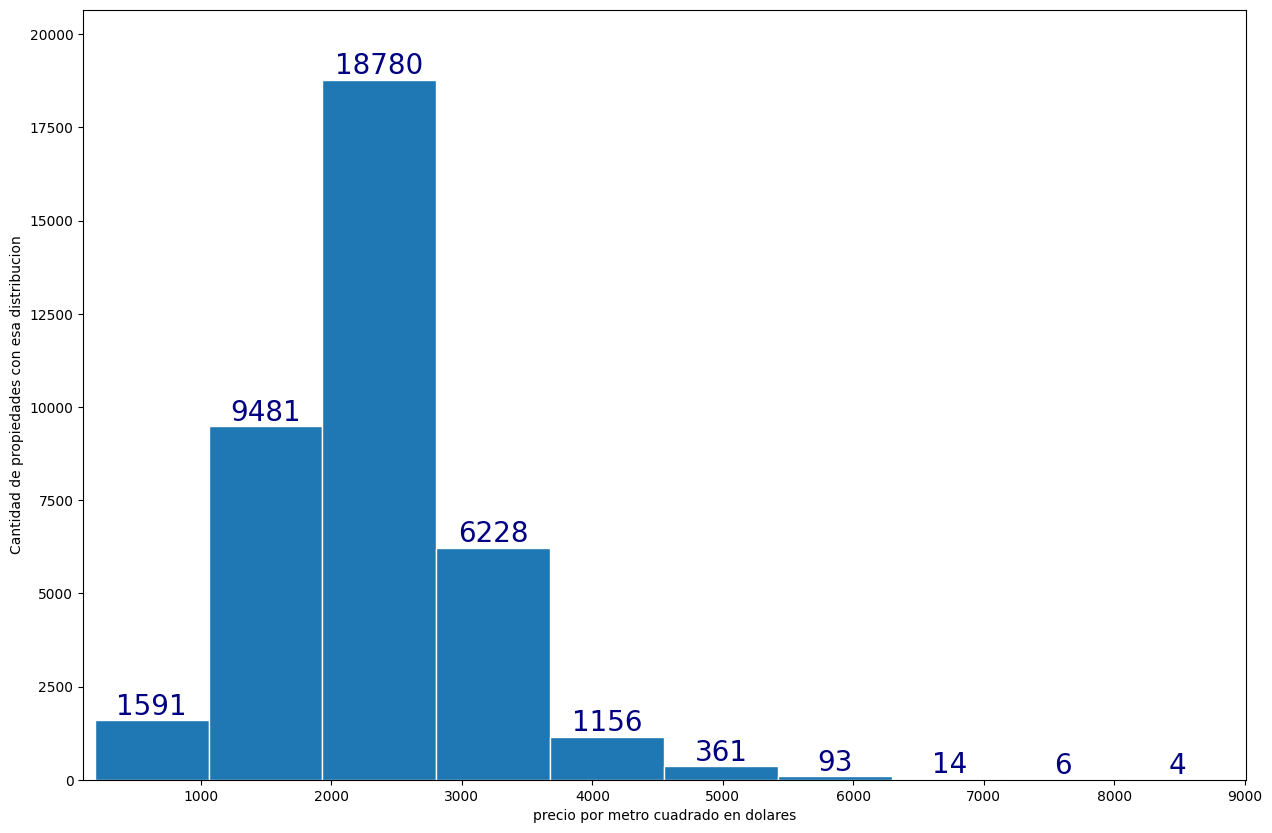

In [14]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_depto['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de departamentos')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

2-Distribución de precio por metro cuadrado de casas:

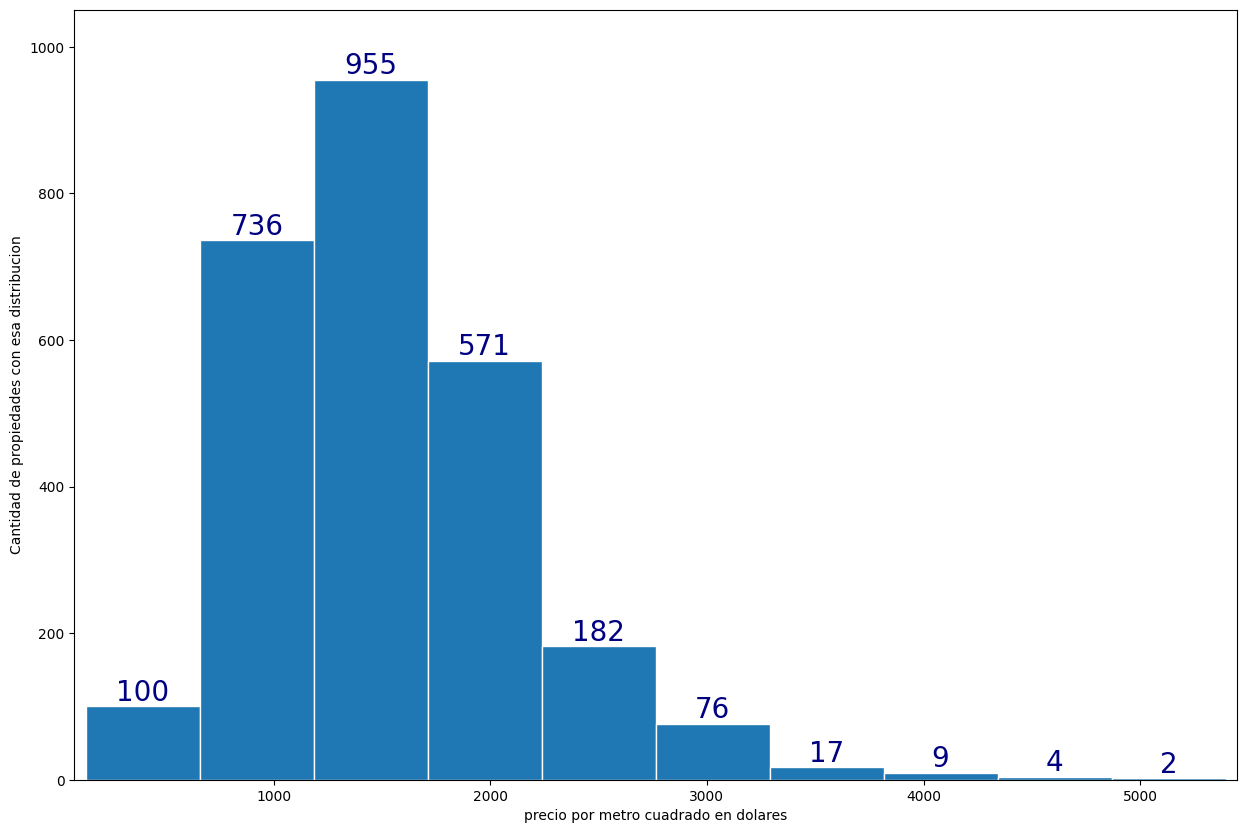

In [15]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_casa['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de casas')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

3-Distribución de precio por metro cuadrado de PHs:

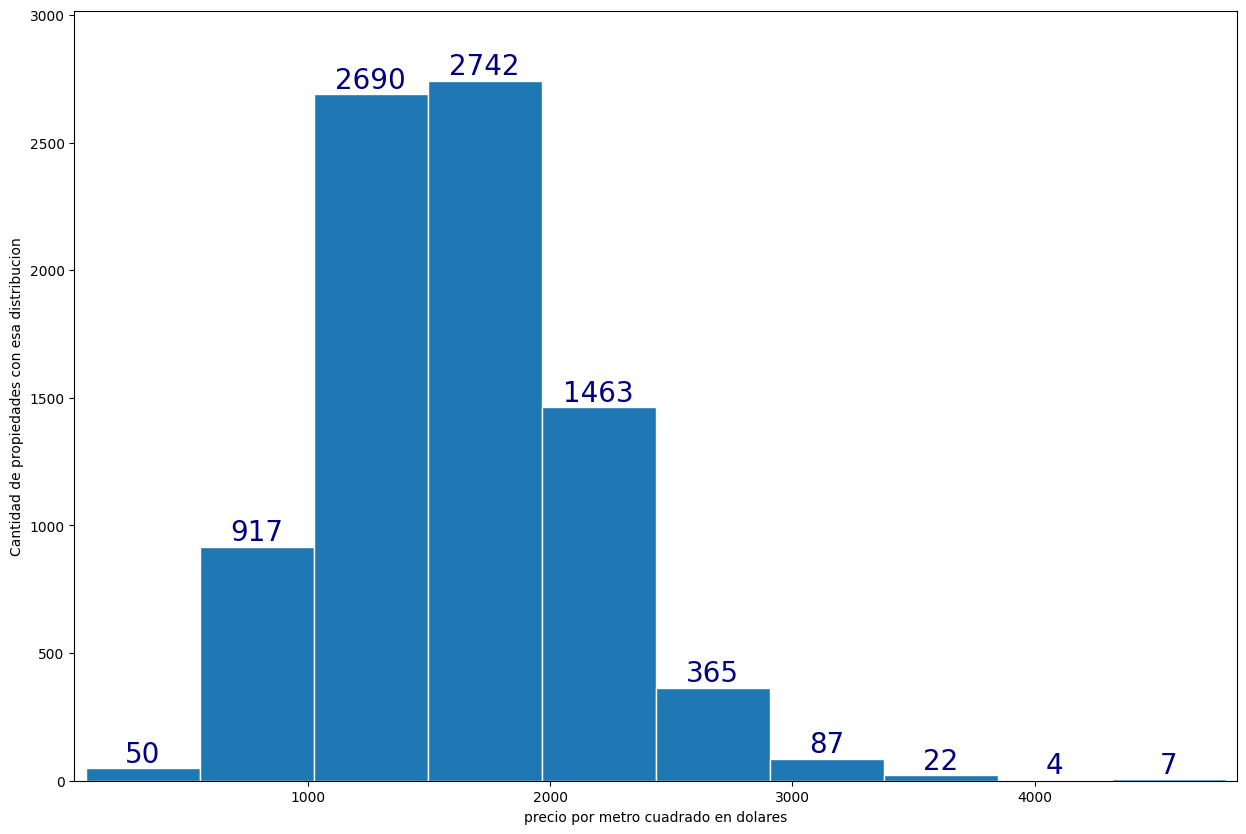

In [16]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(ds_properati_ph['precio_metro_cuadrado'], edgecolor='white')
plt.xlabel("precio por metro cuadrado en dolares")
plt.ylabel("Cantidad de propiedades con esa distribucion")
plt.title = ('Distrubcion precio por metro cuadrado de ph')
plt.bar_label(bars, fontsize=20, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

### Selección de una alternativa para el análisis de la variable tipo_precio:

Se determinó que la mejor alternativa para el análisis de la variable tipo_precio era trabajar la variable precio_metro_cuadrado en base al tipo_de_propiedad, separando a precio_metro_cuadrado en 3 intervalos con la misma cantidad de observaciones. Esto es para tener un dataset balanceado y que los modelos intenten predecir a las 3 clases de forma equitativa.

Al separar por tipo de propiedad se evita el problema de mezclar todos los tipos en uno solo, lo cual llevaría a hacer análisis erróneos.

Añadimos la columna "tipo_precio" al dataset original

In [17]:
ds_properati.loc[ds_equitativa_casa.index,"tipo_precio"] = ds_equitativa_casa["pxm2_igual_frec"] 
ds_properati.loc[ds_equitativa_ph.index,"tipo_precio"] = ds_equitativa_ph["pxm2_igual_frec"] 
ds_properati.loc[ds_equitativa_depto.index,"tipo_precio"] = ds_equitativa_depto["pxm2_igual_frec"] 

ds_properati.head()

,created_on,latitud,longitud,provincia,barrio,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,precio_metro_cuadrado,tipo_precio
0,2021-09-09,-34.631621,-58.416825,Capital Federal,BOEDO,Venta,PH,4.0,2.0,109.394701,73.0,250000.0,USD,2285.302650,alto
1,2021-09-09,-34.623886,-58.412746,Capital Federal,BOEDO,Venta,PH,2.0,1.0,61.000000,46.0,100000.0,USD,1639.344262,medio
2,2021-09-09,-34.625588,-58.423056,Capital Federal,BOEDO,Venta,PH,4.0,2.0,104.000000,54.0,185000.0,USD,1778.846154,medio
3,2021-09-09,-34.629398,-58.425852,Capital Federal,BOEDO,Venta,Departamento,2.0,1.0,62.000000,44.0,100000.0,USD,1612.903226,bajo
4,2021-09-09,-34.626595,-58.420019,Capital Federal,BOEDO,Venta,PH,4.0,3.0,111.000000,101.0,110000.0,USD,990.990991,bajo


### Gráfico CABA

Graficamos los avisos coloreados según la alternativa elegida:

In [18]:
!pip install geopandas
import geopandas as gp
from seaborn import color_palette

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


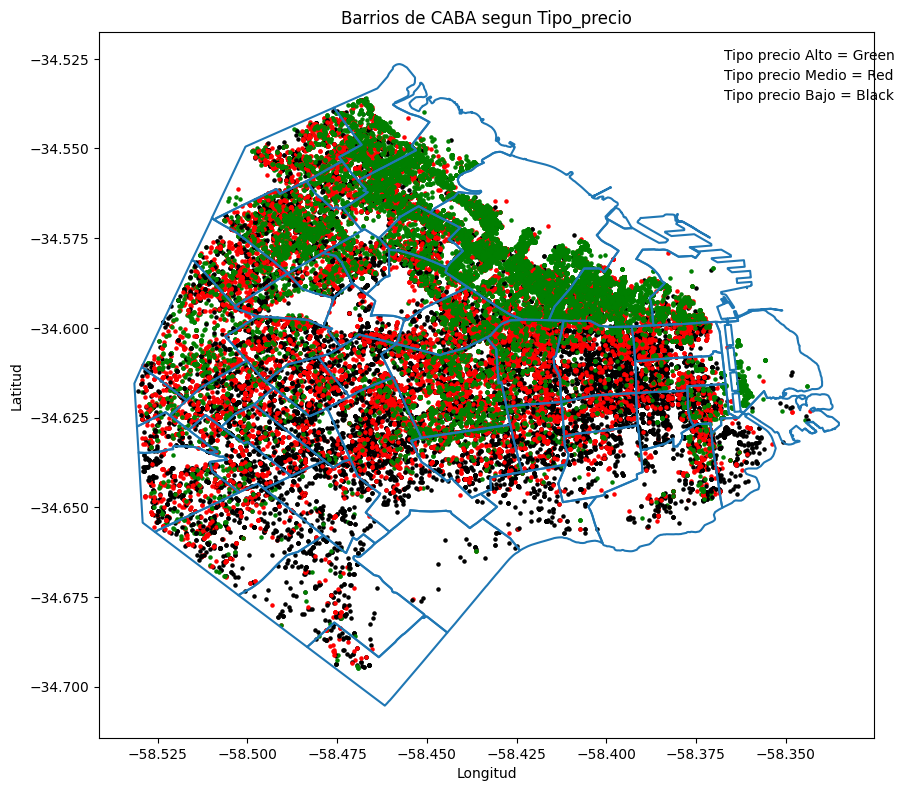

In [19]:

def points_segun_tipo(dataframe,tipo):
    dataframe_tipo = dataframe[dataframe["pxm2_igual_frec"] == tipo]
    latitud = dataframe_tipo.latitud
    longitud = dataframe_tipo.longitud
    points = gp.GeoDataFrame(dataframe_tipo, geometry=gp.points_from_xy(longitud,latitud)) 
    return points

def graficar_caba(lista_dataframe):
    fig, ax = plt.subplots(figsize=(10,10))
    poligonos = gp.read_file("barrios.geojson")
    ax.set_title('Barrios de CABA segun Tipo_precio')
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    poligonos.boundary.plot(ax=ax);
    for dataframe in lista_dataframe:
        points_bajos = points_segun_tipo(dataframe,"bajo")
        points_bajos.plot(ax=ax,markersize=5,color="black")

        points_medio = points_segun_tipo(dataframe,"medio")
        points_medio.plot(ax=ax,markersize=5,color="red")

        points_alto = points_segun_tipo(dataframe,"alto")
        points_alto.plot(ax=ax,markersize=5,color="green")
    plt.figtext(.75, .82, "Tipo precio Alto = Green")
    plt.figtext(.75, .80, "Tipo precio Medio = Red")
    plt.figtext(.75, .78, "Tipo precio Bajo = Black")

    plt.show()

tres_datas = [ds_equitativa_casa,ds_equitativa_ph,ds_equitativa_depto]
graficar_caba(tres_datas)

Compararemos esta clasificación contra el agrupamiento resultante de k-means. Para eso importamos el plot obtenido en kmeans.
![](mapaKmeans.png)

Vemos que:
- En la zona de la costanera y Puerto Madero en ambos casos está coloreada más "fuerte" indicando precios más altos.
- Por Villa Soldati y zonas adyacentes de menos recursos notamos que en ambos casos aparecen puntos de color más oscuro.
- En las zonas intermedias de la ciudad hay una mezcla de los 3 tipos.

### Entrenamiento y Predicción

En esta parte se pide predecir el valor del tipo_precio excluyendo la variable price, precio por metro cuadrado y otra que pueda contener información del precio de venta.

Para cumplir con lo pedido se hacen uso de distintos modelos que permiten predecir el valor de la variable tipo_precio:

- Árbol de decisión.

-  Random forest.

- A elección (completarrrrrrrrrrrrrrrrrrrrrrr).

Para cada uno de los modelos trabajados es necesario hacer un trabajo de transformación de datos, de forma de tener un buen rendimiento en cada modelo usado.

- Transformaciones Árbol de decisión: Es necesario realizar transformaciones sobre variables categóricas de forma que tengan valores numéricos. Para poder realizar dicha transformación se hace uso de la técnica de One Hot Encoding.

NOTA: AVISAR CUALQUIER OTRA TRANSFORMACIÓN REALIZADA.

- Transformaciones Random Forest: 

Importamos las librerías que usaremos

In [20]:
#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Creamos un dataset con los features que usaremos para clasificar

In [21]:
ds_properati.columns.to_list()


['created_on',
 'latitud',
 'longitud',
 'provincia',
 'barrio',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'precio_metro_cuadrado',
 'tipo_precio']

Convertimos la columna de precio_metro_cuadrado a int para usarla en el random forest.

In [22]:
ds_properati['precio_metro_cuadrado'] = ds_properati['precio_metro_cuadrado'].astype(int)
ds_properati_x = ds_properati.drop(['property_price','precio_metro_cuadrado','tipo_precio'], axis='columns', inplace=False)

Creamos el dataset con la variable target

In [23]:
ds_properati_y = ds_properati['tipo_precio'].copy()

In [24]:
#Verifico balanceo de clases
ds_properati['tipo_precio'].value_counts(normalize=True)*100

bajo     33.902654
alto     33.258063
medio    32.839283
Name: tipo_precio, dtype: float64

Generamos los conjuntos de train y test

In [25]:
x_train, x_test, y_train, y_test = train_test_split(ds_properati_x,
                                                    ds_properati_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2,
                                                    ) 

In [26]:
#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

# Datos Entrenamiento: 34099
# Datos Prueba: 14614


### Modelo 1: Árbol de decisión

Se pide la creación de un árbol de decisión con los hiperparámetros más adecuados mediante validación cruzada.

Buscamos la mejor combinación de hiperparámetros.

Exploramos un espacio de búsqueda, usando k-fold Cross Validation para medir el desempeño de cada combinación. Hacemos un Random search.

Se eliminan aquellas columnas del dataset que contengan variables categóricas de único valor. Estas son, la provincia (Capital Federal), el tipo de operación (venta), la moneda (USD). 
Al ser variables con un único valor (no analizamos otras en este tp) no aportan información relevante para el árbol de decisión. En un árbol de decisión se llega a una clasificación para algún atributo del dataset a partir de los valores de sus variables.

Por otro lado, se realiza One Hot Encoding a las variables categóricas que sí interesan para clasificar.

In [ ]:
ds_arbol = ds_properati.copy()
ds_arbol = pd.get_dummies(ds_arbol, columns=['property_type', 'barrio'])
ds_arbol.drop(columns=['created_on', 'property_currency', 'operation', 'provincia'], inplace=True)

#volvemos a separar en train-test
ds_arbol_y = ds_arbol['tipo_precio'].copy()
ds_arbol_x = ds_arbol.drop(['property_price','precio_metro_cuadrado','tipo_precio'], axis='columns', inplace=False)

x_train_arbol, x_test_arbol, y_train_arbol, y_test_arbol = train_test_split(ds_arbol_x,
                                                    ds_arbol_y, 
                                                    test_size=0.3,  #proporcion 70/30
                                                    random_state=2,
                                                    )

Tomamos 5 folds y como métrica F1 Score dado que evalúa tanto precisión como recall. Como tenemos +2 categorías tuvimos que elegir un average entre:
- macro: Calcula métricas para cada etiqueta y encuentre su media no ponderada. Esto no tiene en cuenta el desequilibrio de etiquetas.
- micro: Calcula métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.
- weighted: Calcula métricas para cada etiqueta y encuentra su promedio ponderado por soporte (la cantidad de instancias verdaderas para cada etiqueta). Con el promedio ponderado, el promedio de salida habría representado la contribución de cada clase ponderada por el número de ejemplos de esa clase dada.
(El soporte se refiere al número de ocurrencias reales de la clase en el conjunto de datos)

Elegimos micro dado que no tenemos clases desbalanceadas que necesitemos balancear.

In [28]:
##KFOLD CV Random Search para buscar el mejor arbol (los mejores atributos, hiperparametros,etc)
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import sklearn as sk

#Cantidad de combinaciones que queremos probar
n = 30

#Conjunto de parámetros que queremos usar
params = {'criterion':['gini','entropy'],
            'min_samples_leaf':list(range(1,10)),
            'min_samples_split': list(range(2,20)),
            'ccp_alpha':np.linspace(0,0.05,n), 
            'max_depth':list(range(1,6)),
            'random_state': [0,2]
            }
                
#Cantidad de splits para el Cross Validation
folds = 5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier() 

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score, average='micro')

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n, error_score='raise') 

#Buscamos los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train_arbol,y_train_arbol)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise', estimator=DecisionTreeClassifier(),
                   n_iter=30,
                   param_distributions={'ccp_alpha': array([0.        , 0.00172414, 0.00344828, 0.00517241, 0.00689655,
       0.00862069, 0.01034483, 0.01206897, 0.0137931 , 0.01551724,
       0.01724138, 0.01896552, 0.02068966, 0.02241379, 0.02413793,
       0.02586...03448, 0.03275862,
       0.03448276, 0.0362069 , 0.03793103, 0.03965517, 0.04137931,
       0.04310345, 0.04482759, 0.04655172, 0.04827586, 0.05      ]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19],
                                        'random_state': [0, 2]},
                   scoring=make_scorer(f1_score, average=micro))

A continuación mostramos los mejores parámetros y la mejor métrica que resultaron para el árbol de clasificación:

In [29]:
print(randomcv.best_params_)

print(randomcv.best_score_)

{'random_state': 2, 'min_samples_split': 15, 'min_samples_leaf': 8, 'max_depth': 5, 'criterion': 'entropy', 'ccp_alpha': 0.005172413793103449}
0.5486964919048425


Creamos un clasificador con los hiperparámetros resultantes de CV

In [ ]:
#Creo el árbol con los mejores hiperparámetros
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

arbol=DecisionTreeClassifier().set_params(**randomcv.best_params_)


model_train = arbol.fit(x_train_arbol,y_train_arbol)

reglas = export_text(arbol, feature_names=list(ds_arbol_x.columns))
print(reglas)

|--- latitud <= -34.60
|   |--- barrio_PUERTO MADERO <= 0.50
|   |   |--- barrio_CABALLITO <= 0.50
|   |   |   |--- property_surface_total <= 109.20
|   |   |   |   |--- property_type_Departamento <= 0.50
|   |   |   |   |   |--- class: medio
|   |   |   |   |--- property_type_Departamento >  0.50
|   |   |   |   |   |--- class: bajo
|   |   |   |--- property_surface_total >  109.20
|   |   |   |   |--- property_type_Departamento <= 0.50
|   |   |   |   |   |--- class: bajo
|   |   |   |   |--- property_type_Departamento >  0.50
|   |   |   |   |   |--- class: bajo
|   |   |--- barrio_CABALLITO >  0.50
|   |   |   |--- class: medio
|   |--- barrio_PUERTO MADERO >  0.50
|   |   |--- class: alto
|--- latitud >  -34.60
|   |--- property_surface_total <= 109.20
|   |   |--- longitud <= -58.47
|   |   |   |--- property_type_Departamento <= 0.50
|   |   |   |   |--- class: alto
|   |   |   |--- property_type_Departamento >  0.50
|   |   |   |   |--- class: medio
|   |   |--- longitud >  -58.

Importamos las librerias que necesitamos para graficar el árbol de decisión

In [31]:
!pip install pydotplus

from six import StringIO
from sklearn.metrics import confusion_matrix, classification_report , f1_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Matriz de confusión y performance en train

              precision    recall  f1-score   support

        alto       0.59      0.67      0.63     11306
        bajo       0.59      0.66      0.63     11515
       medio       0.42      0.31      0.36     11278

    accuracy                           0.55     34099
   macro avg       0.53      0.55      0.54     34099
weighted avg       0.54      0.55      0.54     34099

F1-Score: 0.5497815185196047


Text(50.722222222222214, 0.5, 'True')

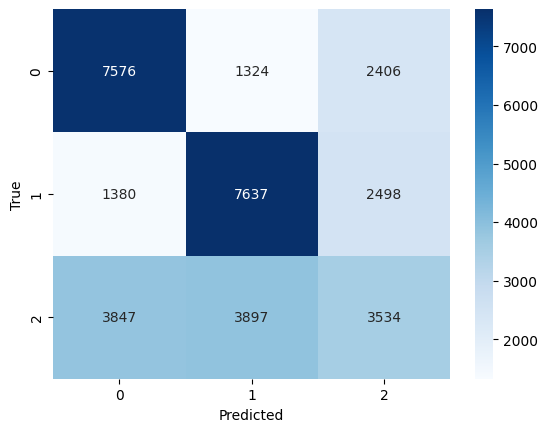

In [32]:
y_pred_train = arbol.predict(x_train_arbol)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_train_arbol,y_pred_train))
print('F1-Score: {}'.format(f1_score(y_train_arbol, y_pred_train, average='micro')))

cm = confusion_matrix(y_train_arbol,y_pred_train)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
plt.figure(figsize=(100,100))

tree_plot_completo = tree.plot_tree(model_train,
                                 feature_names=ds_arbol_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=model_train.classes_) #model.classes_
plt.show(tree_plot_completo)

Matriz de confusión y performance en test

              precision    recall  f1-score   support

        alto       0.59      0.66      0.62      4895
        bajo       0.61      0.66      0.63      5000
       medio       0.41      0.33      0.36      4719

    accuracy                           0.55     14614
   macro avg       0.54      0.55      0.54     14614
weighted avg       0.54      0.55      0.54     14614

F1-Score: 0.5504310934720131


Text(50.722222222222214, 0.5, 'True')

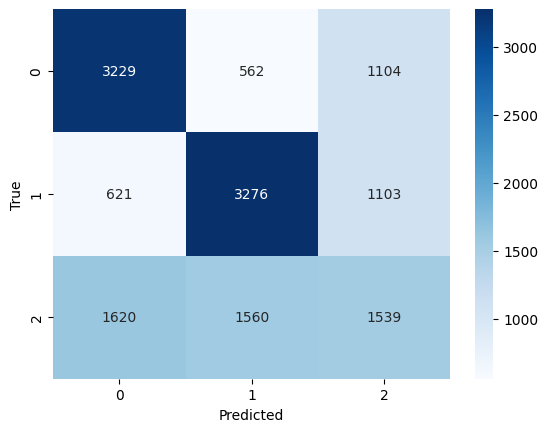

In [34]:
#Hago predicción sobre el set de evaluacion
y_pred = arbol.predict(x_test_arbol)

#Arbol Reporte y Matriz de Confusion
print(classification_report(y_test_arbol,y_pred))
print('F1-Score: {}'.format(f1_score(y_test_arbol, y_pred, average='micro')))

cm = confusion_matrix(y_test_arbol,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Conclusión: Las métricas en train y test son muy similares, sin embargo tiene muchas falencias para detectar la clase 2 (precio medio) en ambos casos. Intentamos mejorar los hiperparámetros pero obtuvimos los mismos resultados.


Probaremos el mismo modelo sobre el data set resultante de aplicar PCA

In [95]:
dataset_reducido = pd.read_csv('dataset_reducido.csv')

### Modelo 2: Random Forest

Cada árbol se construye así:

Dado que el número de casos en el conjunto de entrenamiento es N. Una muestra de esos N casos se toma aleatoriamente pero CON REEMPLAZO. Esta muestra será el conjunto de entrenamiento para construir el árbol i.

Si existen M varibles de entrada, un número m < M se especifica tal que para cada nodo, m variables se seleccionan aleatoriamente de M. La mejor división de estos m atributos es usado para ramificar el árbol. El valor m se mantiene constante durante la generación de todo el bosque.

Cada árbol crece hasta su máxima extensión posible y NO hay proceso de poda. Nuevas instancias se predicen a partir de la agregación de las predicciones de los x árboles (i.e., mayoría de votos para clasificación, promedio para regresión)

Importamos todas las librerías que vamos a necesitar

In [35]:
!pip install 'dtreeviz'

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Creamos el clasificador y entreno el modelo

In [36]:
rfc_default = RandomForestClassifier()
rfc_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Creamos un clasificador con hiperparámetros arbitrarios, ya que después vamos a buscar los mejores, y después entrenamos el modelo.

In [37]:
rfc = RandomForestClassifier(max_features='auto', 
                             oob_score=True, 
                             random_state=2, 
                             n_jobs=-1, 
                             min_samples_leaf=5,
                             min_samples_split=5,
                             n_estimators=50 )
model = rfc.fit(X = x_train_arbol, y = y_train_arbol)

Realizamos una predicción sobre el set de test y mostramos

In [38]:
y_pred = model.predict(x_test_arbol)
y_pred

array(['bajo', 'alto', 'bajo', ..., 'medio', 'bajo', 'alto'], dtype=object)

y lo comparamos con los valores reales

In [39]:
y_test.values

array(['medio', 'medio', 'bajo', ..., 'medio', 'bajo', 'medio'],
      dtype=object)

In [40]:
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

,test,pred
0,medio,bajo
1,medio,alto
2,bajo,bajo
3,alto,alto
4,medio,bajo


Mostramos a traves de una matriz de heatmap comparando los valores predichos con los reales.

Text(50.722222222222214, 0.5, 'True')

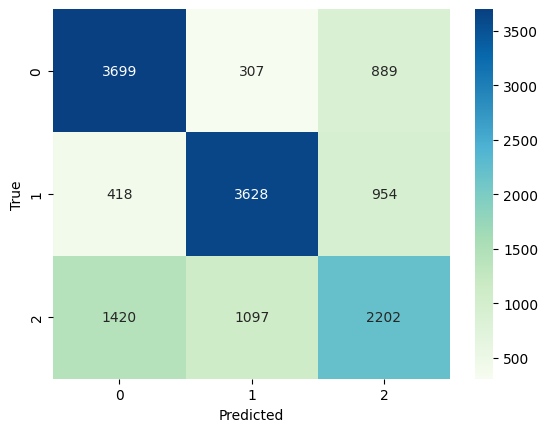

In [41]:

tabla=confusion_matrix(y_test, y_pred)

sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Por este grafico de heatmap podemos ver que detecta muy bien el valor de alto, podemos decir que tiene un buen accuracy para detectar dicho tipo.

Tomamos las métricas.  VER PORQUE DAN IGUALES

In [42]:
print('Accuracy: {}'.format(accuracy_score(y_test,y_pred)))
print('recall: {}'.format(recall_score(y_test,y_pred,average='micro')))
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='micro')))

Accuracy: 0.6520459833036814
recall: 0.6520459833036814
F1-Score: 0.6520459833036814


Estas son las metricas base, a traves de la busqueda de hiperparametros vamos a mejorar las metricas.

Graficamos un arbol de RF

Mostramos que clases y parametros se tiene

In [43]:
model.classes_

array(['alto', 'bajo', 'medio'], dtype=object)

In [44]:
model.estimators_[48]

DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, random_state=546147920)

Tratamos de plotear el arbol 48 pero como es muy extenso graficamos solo una parte reducida

In [45]:
### TARDA MUCHO EN GRAFICAR !!!!!

# plt.figure(figsize=(100,100))

# tree_plot_completo=tree.plot_tree(model.estimators_[48],
#                                  feature_names=ds_properati_x.columns.to_list(),
#                                  filled=True,
#                                  rounded=True,
#                                  class_names=['Alto','Medio','Bajo']) #model.classes_
# plt.show(tree_plot_completo)

Generalmente las features de las primeras ramas son similares entre todos los arboles, a medida que bajamos en las ramas estas cambian.

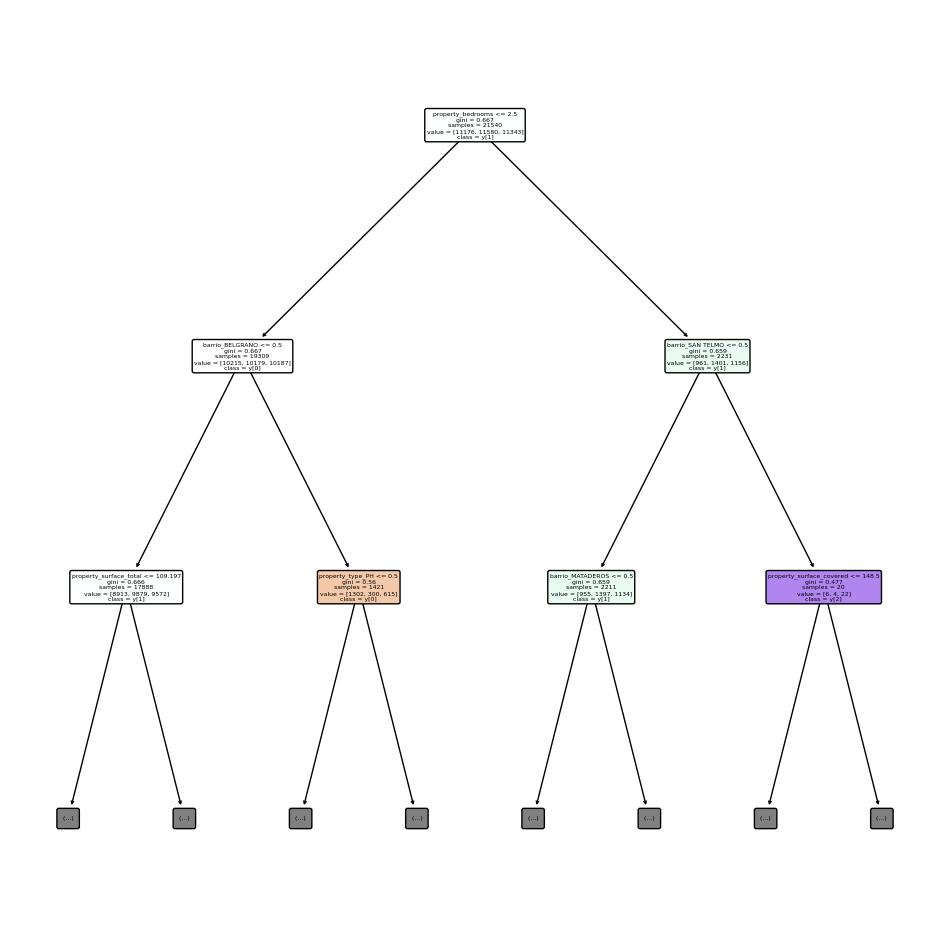

In [ ]:
plt.figure(figsize=(12,12))

tree_plot=tree.plot_tree(model.estimators_[48],
                         max_depth=2,
                         feature_names=ds_arbol_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

!!!!! EXPLICAR LAS REGLAS

Importancia de Atributos

In [47]:
sorted(list(zip(ds_arbol_decision.columns.to_list(), model.feature_importances_)), key=lambda x: -x[1])

[('latitud', 0.27484042261955177),
 ('property_surface_total', 0.1962583388222866),
 ('longitud', 0.15512954302851634),
 ('property_surface_covered', 0.10267319329675902),
 ('barrio_MONTE CASTRO', 0.044690264767679934),
 ('property_rooms', 0.031652350178163445),
 ('barrio_PARQUE PATRICIOS', 0.018008549372682477),
 ('barrio_BALVANERA', 0.015983915580385047),
 ('precio_metro_cuadrado', 0.01549500977951747),
 ('tipo_precio', 0.01492703314445936),
 ('property_bedrooms', 0.014629007607365335),
 ('barrio_PATERNAL', 0.011269307779309304),
 ('barrio_BELGRANO', 0.00861792489363578),
 ('barrio_AGRONOMIA', 0.00860464165633638),
 ('property_price', 0.006411068766822633),
 ('barrio_COLEGIALES', 0.005248381278774032),
 ('barrio_MATADEROS', 0.005232890800176165),
 ('barrio_TRIBUNALES', 0.00484451103588169),
 ('barrio_RECOLETA', 0.004261488530459704),
 ('barrio_VERSALLES', 0.004194008172740407),
 ('barrio_ABASTO', 0.0038252287538151418),
 ('barrio_CONGRESO', 0.0034198867484270218),
 ('barrio_ALMAGRO',

Aca estamos evaluando la importancia en los 50 arboles que generamos en conjunto. Podemos ver que el feature latitud tiene la importancia mas alta, por lo que nos permite graficar mejor. Esto se puede explicar, ya que como podemos ver en el mapa de Caba, hay una clara discretizacion agrupacion de los tipos de precio con las zonas. Por ejemplo, se puede ver una conglomeracion de puntos verdes por la zona de Palermo, por lo que no seria sorpresa que por esa zona haya un punto verde.

Busqueda de Hiperparámetros mediante k-fold Cross Validation


Buscamos los 

In [85]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
import sklearn as sk


base_tree = RandomForestClassifier(oob_score=True, random_state=2, n_jobs=-1) 

#Cantidad de combinaciones que queremos probar
n = 10

#Conjunto de parámetros que queremos usar
params = {'criterion':['gini','entropy'],
            'max_features':['auto', 'sqrt', 'log2'],   
            'min_samples_leaf': [1,5,10],
            'min_samples_split':[2,4,10,12,14,16],
            'n_estimators':[10,20,50]
            }

#Cantidad de splits para el Cross Validation
folds = 5

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(sk.metrics.f1_score, average='micro')

#Random Search Cross Validation
randomcvRF = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n, error_score='raise') 

#Buscamos los hiperparamtros que optimizan F1 Score
randomcvRF.fit(x_train_arbol,y_train_arbol)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise',
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=2),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 4, 10, 12, 14,
                                                              16],
                                        'n_estimators': [10, 20, 50]},
                   scoring=make_scorer(f1_score, average=micro))

Mostramos los mejores parámetros obtenidos con Random CrossValidation

In [86]:
randomcvRF.best_params_

{'n_estimators': 20,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'criterion': 'gini'}

Mostramos la mejor metrica

In [92]:
print("accuracy en entrenamiento con cv: "+str(randomcvRF.best_score_))

accuracy en entrenamiento con cv: 0.6758554736872435


Ahora entrenamos el modelo con los mejores hiperparametros

In [89]:
rf_cv_best=randomcvRF.best_estimator_
y_pred_rf_cv_best = rf_cv_best.predict(x_test_arbol)

              precision    recall  f1-score   support

        alto       0.72      0.75      0.74      4895
        bajo       0.76      0.76      0.76      5000
       medio       0.59      0.56      0.58      4719

    accuracy                           0.69     14614
   macro avg       0.69      0.69      0.69     14614
weighted avg       0.69      0.69      0.69     14614



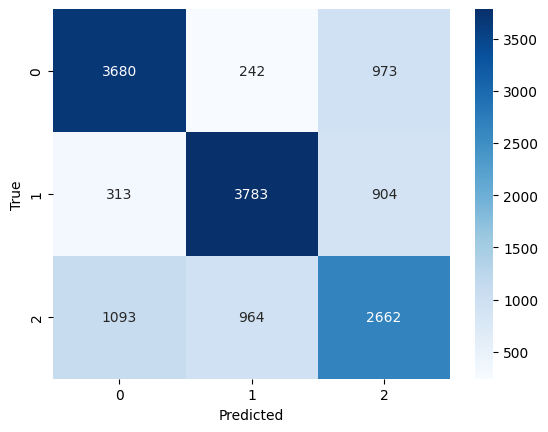

In [90]:

tabla=confusion_matrix(y_test_arbol,y_pred_rf_cv_best)

#Grafico matriz de confusión
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test_arbol,y_pred_rf_cv_best))

Mediante este heatmap se puede ver que al obtener los mejores hiperparametros, pudimos obtener una clara mejoria de la precision del arbol comparando el test con el predicho.

Multimetrica

In [102]:
metricas=['accuracy','f1','roc_auc'] #'recall','precision'

random_multimetrica = RandomizedSearchCV(estimator=randomcvRF, 
                               param_grid=param_grid, 
                               scoring=metricas, 
                               refit=False, 
                               cv=5, 
                               n_jobs=-1)
#Entrenamiento
random_multimetrica_fit = random_multimetrica.fit(X = x_train_arbol, y = y_train_arbol)

TypeError: __init__() got an unexpected keyword argument 'param_grid'

## Modelo 3: KNN

K-vecinos más cercanos (KNN)

El algoritmo K-Nearest Neighbors, o simplemente KNN, funciona obteniendo un punto dado y evaluando sus "k" vecinos para encontrar similitudes.

Se puede utilizar para clasificación o regresión.

La idea se basa en el hecho de que los puntos de datos similares estarán más cerca en el espacio que los puntos que son muy diferentes entre sí.

ACA VA UNA FOTO

Se observa que 4 de esos puntos más cercanos son triángulos y sólo uno es un cuadrado. El "grupo" de círculos está demasiado lejos para ser considerado.

Entonces, según la lógica KNN, podemos concluir que el punto X es un triángulo.

Importamos las librerias que usaremos:

In [50]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Separamos los conjuntos de Train y Test

In [61]:
#Separo conjunto de Train y de Test (80/20)
ds_KNN_clasificación = ds_properati.copy()
ds_KNN_clasificación = pd.get_dummies(ds_KNN_clasificación, columns=['property_type', 'barrio'])
ds_KNN_clasificación.drop(columns=['created_on', 'property_currency', 'operation', 'provincia'], inplace=True)
ds_KNN_clasificación_x = ds_KNN_clasificación.drop(['property_price','precio_metro_cuadrado','tipo_precio'], axis='columns', inplace=False)
ds_KNN_clasificación_y = ds_KNN_clasificación['tipo_precio'].copy()

x_train_KNN, x_test_KNN, y_train_KNN, y_test_KNN = train_test_split(ds_KNN_clasificación_x,
                                                                    ds_KNN_clasificación_y,
                                                                    test_size=0.3,
                                                                    random_state=2)


Creamos un modelo con los parámetros por defecto:

In [62]:
#Crear el modelo
KNN_Classifier = KNeighborsClassifier()

#vemos sus parámetros
KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Entrenamos el modelo con Cross Validation

In [63]:
#Entrenar el modelo
KNN_Classifier.fit(x_train_KNN, y_train_KNN)

#Predicción sobre test
y_pred_KNN_clasificacion = KNN_Classifier.predict(x_test_KNN)

In [69]:
#Cantidad de aciertos
print('correctas: ', np.sum(y_test_KNN == y_pred_KNN_clasificacion))
print('total: ', len(y_test_KNN))

correctas:  8673
total:  14614


In [70]:
accuracy_score(y_test,y_pred)

0.6520459833036814

Entrenamos el modelo con Cross Validation

(Se eligió de 1 a 5 vecinos ya que más de eso, el algoritmo tardaba demasiado en correr)

In [79]:
from sklearn.model_selection import cross_val_score

k_range=range(1,5) #cantidad de vecinos a probar

k_scores=[] # accuracy para cada K utilizado

for k in k_range:
    #clasificador Knn
    knn=KNeighborsClassifier(n_neighbors=k)
    #uso 10 folds
    scores=cross_val_score(knn,x_train_KNN,y_train_KNN,cv=10,scoring='accuracy')
    #promedio las 10 métricas
    k_scores.append(scores.mean())

Búsqueda de Hiperparámetros

usando random search cross validation

n_neighbors: número de vecinos a considerar, por defecto este valor esta seteado en 5.
algorithm: algoritmo utilizado para calcular los vecinos más cercanos

ball_tree: utilizará BallTree
kd_tree: utilizará KDTree
brute: utilizará una búsqueda de fuerza bruta.
metric: métrica a utilizar para el cálculo de la distancia. El valor predeterminado es "minkowski". Las métricas válidas dependerán del algorítmo que utilicemos.

eculidea
manhattan
city block
...


weights: función de peso utilizada en la predicción

uniform: pesos uniformes, todos los puntos en cada "vecindario" pesan lo mismo.
distance: el peso de cada punto (vecino) se asigna en forma inversa a su distancia.

In [91]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,5), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)

rand.fit(x_train_KNN, y_train_KNN)
rand.cv_results_['mean_test_score']

array([0.63834701, 0.55004531, 0.55406311, 0.63778984, 0.60541356,
       0.63696874, 0.63397751, 0.63773119, 0.56576388, 0.63397751])

Mostramos los mejores parámetros y la mejor métrica

In [93]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
0.6383470096836991


In [96]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred_KNN_clasificacion=best_knn.predict(x_test_KNN)

#Accuracy test
accuracy_score(y_test_KNN,y_pred_KNN_clasificacion)

0.6478719036540304

              precision    recall  f1-score   support

        alto       0.67      0.69      0.68      4895
        bajo       0.72      0.69      0.71      5000
       medio       0.55      0.55      0.55      4719

    accuracy                           0.65     14614
   macro avg       0.65      0.65      0.65     14614
weighted avg       0.65      0.65      0.65     14614



Text(50.722222222222214, 0.5, 'True')

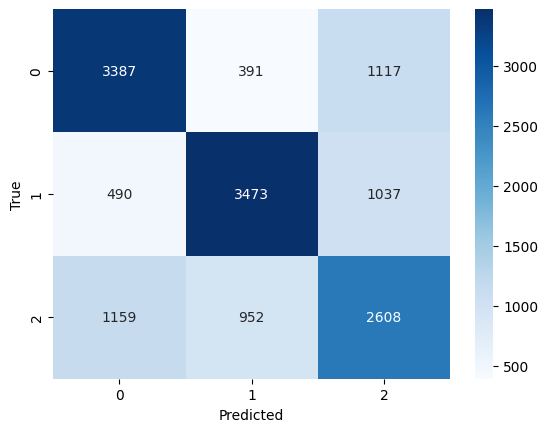

In [99]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test_KNN,y_pred_KNN_clasificacion))

#Matriz de Confusión
cm = confusion_matrix(y_test_KNN,y_pred_KNN_clasificacion)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fcb02109-3268-4805-81b4-1fba96795907' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>